In [1]:
import numpy as np
import os
import glob
import matplotlib.pyplot as plt
from pyresample import kd_tree, geometry 

In [2]:
grd_file18 = r'/Users/gonzalgo/Downloads/greenl_00605_18011_002_180310_ALTTBB_HH_01.hgt.grd'
grd_file17 = r'/Users/gonzalgo/Downloads/greenl_00605_17028_004_170311_ALTTBB_HH_04.hgt.grd'

In [3]:
data18 = np.fromfile(grd_file18, dtype = '<f4')
data17 = np.fromfile(grd_file17, dtype = '<f4')

In [4]:
lat_lines18 = 28588
lon_lines18 = 8396

In [5]:
lat_lines17 = 28685
lon_lines17 = 8409

In [6]:
data18 = np.reshape(data18, (lat_lines18, lon_lines18))
data17 = np.reshape(data17, (lat_lines17, lon_lines17))

In [7]:
data_nan18 = np.where(data18 > -10000, data18, np.nan)
data_nan17 = np.where(data17 > -10000, data17, np.nan)

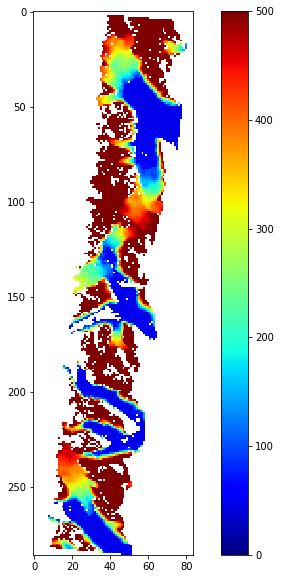

In [8]:
plt.figure(figsize=(10,10));
plt.imshow(data_nan18[::100, ::100], vmin=0, vmax=500, cmap='jet');plt.colorbar()

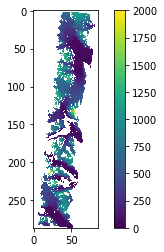

In [9]:
plt.imshow(data_nan17[::100, ::100], vmin=0, vmax=2000);plt.colorbar()

In [10]:
lat_start18 = 63.938138888888894  
lon_start18 = -41.987166666666667
lat_space18 = -2.777777777777778E-05
lon_space18 = 5.555555555555556E-05

lats18 = np.linspace(lat_start18 - 0.5 * lat_space18, (lat_start18 - 0.5 * lat_space18) + (lat_space18 * (lat_lines18 + 1)), lat_lines18 + 1)
lons18 = np.linspace(lon_start18 - 0.5 * lon_space18, (lon_start18 - 0.5 * lon_space18) + (lon_space18 * (lon_lines18 + 1)), lon_lines18 + 1)

In [11]:
lat_start17 = 63.943638888888898
lon_start17 = -41.986611111111117
lat_space17 = -2.777777777777778E-05
lon_space17 = 5.555555555555556E-05

lats17 = np.linspace(lat_start17 - 0.5 * lat_space17, (lat_start17 - 0.5 * lat_space17) + (lat_space17 * (lat_lines17 + 1)), lat_lines17 + 1)
lons17 = np.linspace(lon_start17 - 0.5 * lon_space17, (lon_start17 - 0.5 * lon_space17) + (lon_space17 * (lon_lines17 + 1)), lon_lines17 + 1)

CPU times: user 182 ms, sys: 26.2 ms, total: 209 ms
Wall time: 211 ms


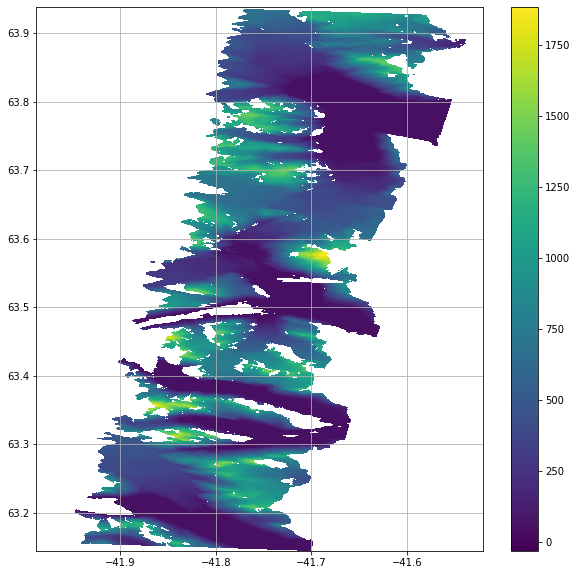

In [12]:
%time plt.figure(figsize=(10,10));plt.pcolormesh(lons18[::10], lats18[::10], data_nan18[::10, ::10]);plt.grid();plt.colorbar()

CPU times: user 178 ms, sys: 26.5 ms, total: 205 ms
Wall time: 206 ms


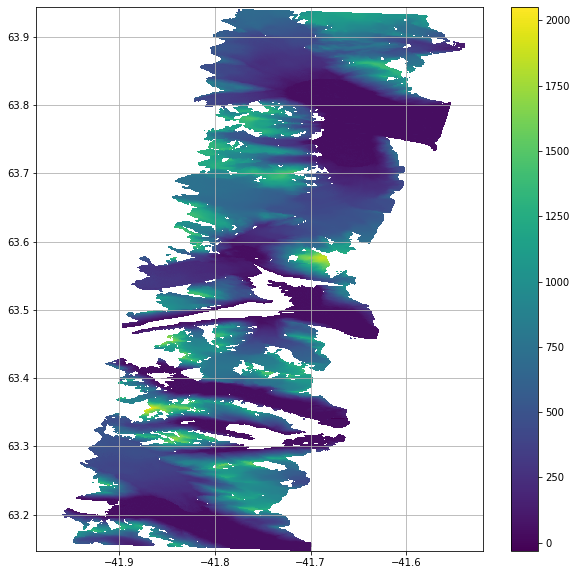

In [13]:
%time plt.figure(figsize=(10,10));plt.pcolormesh(lons17[::10], lats17[::10], data_nan17[::10, ::10]);plt.grid();plt.colorbar()

In [14]:
lower_left_lat18 = 63.156767143
lower_left_lon18 = -41.987115124
upper_right_lat18 = 63.925046546
upper_right_lon18 = -41.520804387

area_id = 'WGS84'
description = 'lat-lon'
proj_id = 'greenl_00605_180310'
proj_string = 'EPSG:4326'
width = 840
height = 2859
area_extent = (lower_left_lon18, lower_left_lat18, upper_right_lon18, upper_right_lat18)
area_original_18 = geometry.AreaDefinition(area_id, description, proj_id, proj_string, width, height, area_extent)

In [15]:
upper_right_lat17 = 63.930550738
upper_right_lon17 = -41.519516372
lower_left_lat17 = 63.159604107
lower_left_lon17 = -41.986574677


area_id = 'WGS84'
description = 'lat-lon'
proj_id = 'greenl_00605_170311'
proj_string = 'EPSG:4326'
width = 841
height = 2869
area_extent = (lower_left_lon17, lower_left_lat17, upper_right_lon17, upper_right_lat17)
area_original_17 = geometry.AreaDefinition(area_id, description, proj_id, proj_string, width, height, area_extent)

In [16]:
data_nan_subset18 = data_nan18[::10, ::10]
data_nan_subset17 = data_nan17[::10, ::10]

In [17]:
new_area_dxdy_m = 150
n_cells_x = 300
n_corners_x = n_cells_x + 1
start_x = 339900 
end_x   = start_x + n_cells_x*new_area_dxdy_m
new_area_len_x_m = end_x - start_x

print('new area len x (m) ', new_area_len_x_m)
print(start_x, end_x)
print(n_corners_x)

new area len x (m)  45000
339900 384900
301


In [18]:
n_cells_y = 670
n_corners_y = n_cells_y + 1
start_y = 6999500 
end_y   = start_y + n_cells_y*new_area_dxdy_m
new_area_len_y_m = end_y - start_y

print('new area len y (m) ', new_area_len_y_m)
print(start_y, end_y)
print(n_corners_y)

new area len y (m)  100500
6999500 7100000
671


In [19]:
ndx = 300

In [20]:
ndy = 670
end_y = 7100000
start_y = end_y - ndy*new_area_dxdy_m
new_area_len_y_m = end_y - start_y
print('new area len y (m) ', new_area_len_y_m)
print(start_y, end_y)

new area len y (m)  100500
6999500 7100000


In [21]:
x_ul = np.linspace(start_x, end_x, n_corners_x)
x_ul[0:5]

array([339900., 340050., 340200., 340350., 340500.])

In [22]:
y_ul = np.linspace(start_y, end_y, n_corners_y)
y_ul[0:5]

array([6999500., 6999650., 6999800., 6999950., 7000100.])

In [23]:
area_id = 'WGS84'
description = 'UTM 24n'
proj_id = 'greenl_00605_180310_new'
proj_string = 'EPSG:32624'
width = ndx ## grid cells
height = ndy  ## grid cells
area_extent = (start_x, start_y, end_x, end_y)
area_new = geometry.AreaDefinition(area_id, description, proj_id, proj_string, width, height, area_extent)

In [24]:
area_new.corners

[(-42.271519744544804, 63.98926185677069),
 (-41.355730558842716, 64.00701945717312),
 (-41.28255017166172, 63.10715813232796),
 (-42.169991991049734, 63.09008318144586)]

In [25]:
area_new.area_extent_ll

(-42.1714016986668, 63.08937787415992, -41.354254738743556, 64.00771679835776)

In [26]:
new_grid_lon, new_grid_lat =area_new.get_lonlats()

In [27]:
new_grid_lat

array([[63.98926186, 63.98933086, 63.9893998 , ..., 64.00691986,
        64.00696969, 64.00701946],
       [63.98791795, 63.98798695, 63.98805589, ..., 64.0055749 ,
        64.00562473, 64.00567449],
       [63.98657403, 63.98664303, 63.98671197, ..., 64.00422994,
        64.00427977, 64.00432953],
       ...,
       [63.09277161, 63.09283797, 63.09290427, ..., 63.10975276,
        63.10980068, 63.10984854],
       [63.0914274 , 63.09149375, 63.09156005, ..., 63.10840757,
        63.10845548, 63.10850334],
       [63.09008318, 63.09014954, 63.09021583, ..., 63.10706237,
        63.10711028, 63.10715813]])

In [28]:
%time result18 = kd_tree.resample_nearest(area_original_18, \
                                          data_nan_subset18, \
                                          area_new, \
                                          radius_of_influence=new_area_dxdy_m, \
                                          fill_value=np.nan)

CPU times: user 607 ms, sys: 103 ms, total: 710 ms
Wall time: 734 ms


In [71]:
data_nan_subset18.shape

(2859, 840)

In [72]:
area_new.shape

(670, 300)

In [74]:
result18.shape

(670, 300)

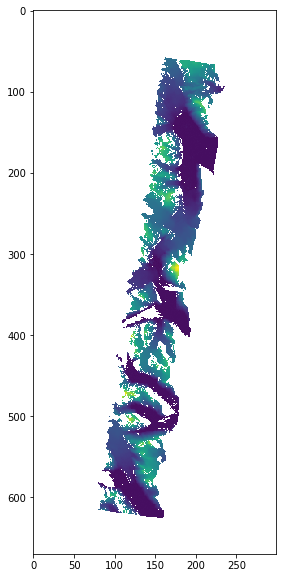

In [29]:
plt.figure(figsize=(10,10));plt.imshow(result18)

In [30]:
%time result17 = kd_tree.resample_nearest(area_original_17, \
                                          data_nan_subset17, area_new, \
                                          radius_of_influence=new_area_dxdy_m, fill_value=np.nan)

CPU times: user 598 ms, sys: 98.4 ms, total: 697 ms
Wall time: 715 ms


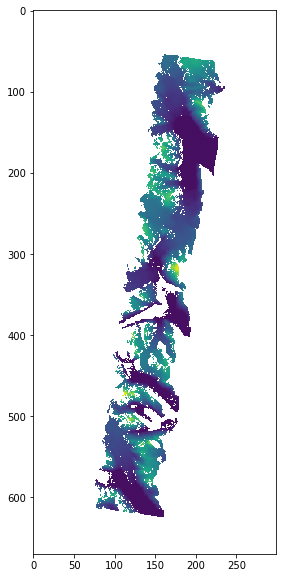

In [31]:
plt.figure(figsize=(10,10));plt.imshow(result17)

In [32]:
150*100

15000

In [33]:
xe = np.linspace(350000, 378000, 300)
ye = np.linspace(7100000, 7000000, 670)
xx, yy = np.meshgrid(xe, ye)

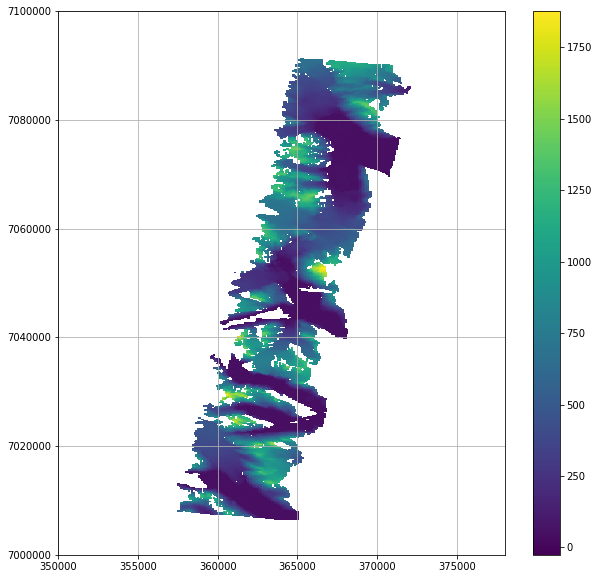

In [34]:
plt.figure(figsize=(10, 10));plt.pcolormesh(xx, yy, result18);plt.colorbar();plt.grid();

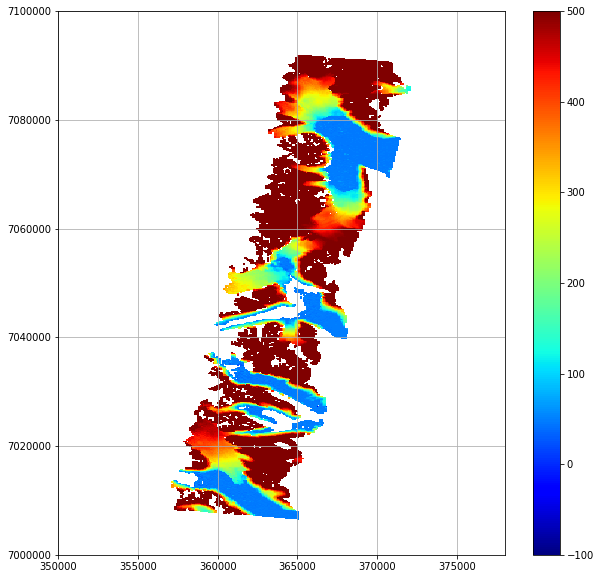

In [35]:
plt.figure(figsize=(10, 10));plt.pcolormesh(xx, yy, result17, vmin=-100, vmax=500, cmap='jet');plt.colorbar();plt.grid();

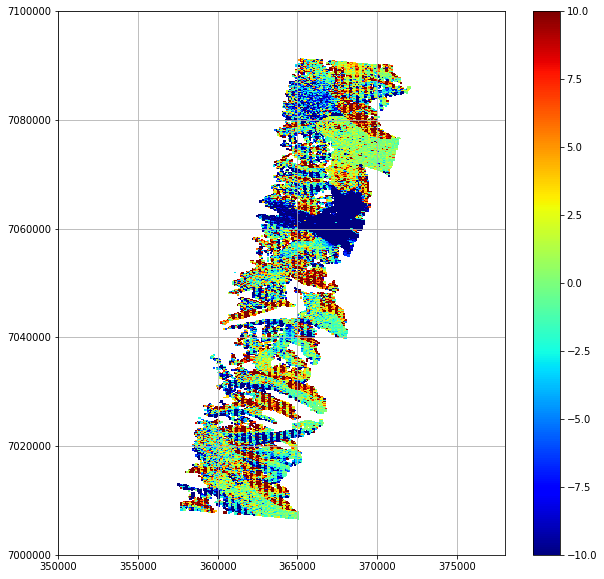

In [36]:
plt.figure(figsize=(10, 10));plt.pcolormesh(xx, yy, result18 - result17, vmax=10, vmin=-10, cmap='jet');plt.colorbar();plt.grid();

In [37]:
result18.shape

(670, 300)

In [38]:
import xarray as xr

In [39]:
y_ul_flipped = y_ul[:-1][::-1]

In [65]:
x_ul.shape

(301,)

In [66]:
y_ul.shape

(671,)

In [40]:
foo = xr.Dataset({'elevation': (['y','x'], result18)},
                   coords = {'y': y_ul_flipped,
                             'x': x_ul[:-1],
                             'longitude': (('y','x'), new_grid_lon),
                             'latitude' : (('y','x'), new_grid_lat)})

In [67]:
result18.shape

(670, 300)

In [73]:
new_grid_lon.shape

(670, 300)

In [68]:
new_grid_lat.shape

(670, 300)

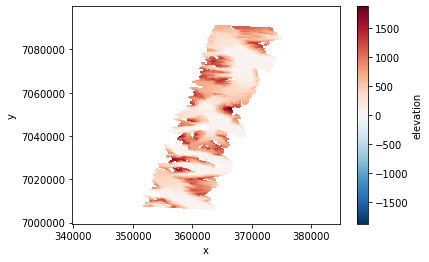

In [41]:
foo.elevation.plot()

In [42]:
foo.to_netcdf('/Users/gonzalgo/test.nc')

In [43]:
foo2=xr.open_dataset('/Users/gonzalgo/test.nc')
foo2

<xarray.Dataset>
Dimensions:    (x: 300, y: 670)
Coordinates:
    longitude  (y, x) float64 ...
    latitude   (y, x) float64 ...
  * y          (y) float64 7.1e+06 7.1e+06 7.1e+06 ... 7e+06 7e+06 7e+06
  * x          (x) float64 3.399e+05 3.400e+05 3.402e+05 ... 3.846e+05 3.848e+05
Data variables:
    elevation  (y, x) float32 ...

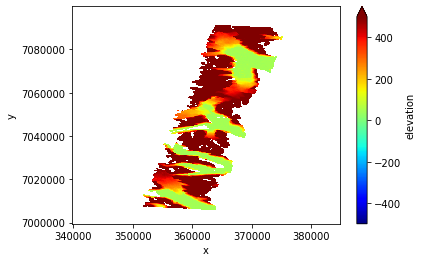

In [44]:
foo2.elevation.plot(vmin=-500, vmax=500, cmap='jet')

In [45]:
foo

<xarray.Dataset>
Dimensions:    (x: 300, y: 670)
Coordinates:
  * y          (y) float64 7.1e+06 7.1e+06 7.1e+06 ... 7e+06 7e+06 7e+06
  * x          (x) float64 3.399e+05 3.400e+05 3.402e+05 ... 3.846e+05 3.848e+05
    longitude  (y, x) float64 -42.27 -42.27 -42.27 ... -41.29 -41.29 -41.28
    latitude   (y, x) float64 63.99 63.99 63.99 63.99 ... 63.11 63.11 63.11
Data variables:
    elevation  (y, x) float32 nan nan nan nan nan nan ... nan nan nan nan nan

In [46]:
area_new.proj4_string

'EPSG:32624'

In [47]:
area_new.description

'UTM 24n'

In [48]:
area_new.proj_id

'greenl_00605_180310_new'

In [49]:

#%%
foo.elevation.attrs['description'] = 'some elevation from line 605'
foo.elevation.attrs['units'] = 'meters'

foo.attrs['xmin'] = np.min(x_ul)
foo.attrs['ymax'] = np.max(y_ul)
foo.attrs['dx_spacing'] = new_area_dxdy_m
foo.attrs['dy_spacing'] = new_area_dxdy_m
foo.attrs['grid_mapping'] = 'crs'    
foo.attrs['no_data'] = -9999.0
foo.attrs['srid'] = "urn:ogc:def:crs:EPSG::32624";
foo.attrs['proj4text'] = area_new.proj4_string
foo.attrs['Projection'] = area_new.description
foo.attrs['proj_id'] = area_new.proj_id
foo.attrs['Insitution'] = 'JPL'
foo.attrs['author'] = 'Matthew G.'
foo.attrs['nx'] = len(x_ul)-1
foo.attrs['ny'] = len(y_ul)-1
foo.attrs['_FillValue'] = np.NaN
foo.attrs['_CoordinateTransformType'] = "Projection";
foo.attrs['_CoordinateAxisTypes'] = "GeoX GeoY";

foo['x'].attrs['units']='meters'
foo['x'].attrs['long_name'] = 'X'
foo['x'].attrs['coverage_content_type'] = 'coordinate'
foo['x'].attrs['standard_name'] = 'projection_x_coordinate'
foo['x'].attrs['axis'] = 'X'
foo['x'].attrs['valid_range'] = (np.min(x_ul), np.max(x_ul))

foo['y'].attrs['units']='meters'
foo['y'].attrs['long_name'] = 'Y'
foo['y'].attrs['coverage_content_type'] = 'coordinate'
foo['y'].attrs['standard_name'] = 'projection_x_coordinate'
foo['y'].attrs['axis'] = 'Y'
foo['y'].attrs['valid_range'] = (np.min(y_ul), np.max(y_ul))

foo.attrs['cdm_data_type']  = 'Grid'
foo.attrs['geospatial_lat_units'] = "degree_north";
foo.attrs['geospatial_lon_units'] = "degree_east";
foo.attrs['geospatial_x_units'] = "meters";
foo.attrs['geospatial_y_units'] = "meters";
foo.attrs['geospatial_bounds_crs'] = "EPSG:32624";
foo.attrs['geospatial_x_resolution'] = str(new_area_dxdy_m) + " meters";
foo.attrs['geospatial_y_resolution'] = str(new_area_dxdy_m) + " meters";



In [50]:
foo.to_netcdf('/Users/gonzalgo/test3.nc')

In [51]:
from pyproj import Proj

In [52]:
myproj = Proj('+proj=utm +zone=24W, +north +ellps=WGS84 +datum=WGS84 +units=m +no_defs')

In [53]:
utmx, utmy = myproj(-42, 63.2)

In [54]:
utmx

349123.78199788416

In [55]:
utmy

7011399.733443487

In [56]:
myproj2 = Proj('+proj=utm +zone=24, +north +ellps=WGS84 +datum=WGS84 +units=m +no_defs')

In [57]:
utmx2, utmy2 = myproj2(-42, 63.2)

In [58]:
utmx2

349123.78199788416

In [59]:
utmy2

7011399.733443487

In [60]:
import utm

In [61]:
x = utm.from_latlon(63.2, -42)

In [62]:
x

(349123.7820017477, 7011399.734260653, 24, 'V')

In [63]:
x[2]

24